In [ ]:
# Author: Brandon Botzer
# Date: 1/21/2024
# Class: Penn State - AI 879

Ex 3.1:
Color balance. Write a simple application to change the color balance of an image
by multiplying each color value by a different user-specified constant. If you want to get
fancy, you can make this application interactive, with sliders.

1. Do you get different results if you take out the gamma transformation before or after
  doing the multiplication? Why or why not?

2. Take the same picture with your digital camera using different color balance settings
  (most cameras control the color balance from one of the menus). Can you recover what
  the color balance ratios are between the different settings? You may need to put your
  camera on a tripod and align the images manually or automatically to make this work.
  Alternatively, use a color checker chart (Figure 10.3b), as discussed in Sections 2.3 and
  10.1.1.

3. Can you think of any reason why you might want to perform a color twist (Sec-
  tion 3.1.2) on the images? See also Exercise 2.8 for some related ideas.

In [2]:
# Common Imports

import skimage as ski
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button, Slider

In [3]:
# Read in an image that I took of an album cover
otrav = ski.io.imread('OceanTraveler.jpg')

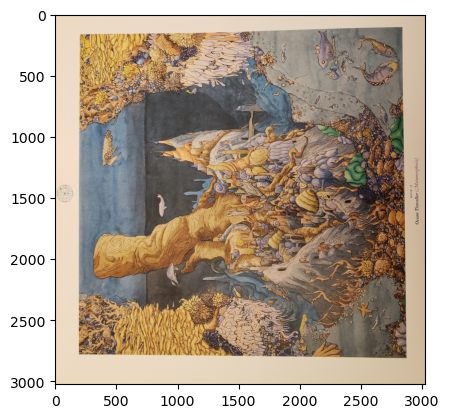

In [6]:
plt.imshow(otrav)

In [7]:
# Look at the shape
row, col, channel = otrav.shape

In [8]:
# Set the multiplicative value for color scaling
mult_value = 0.3

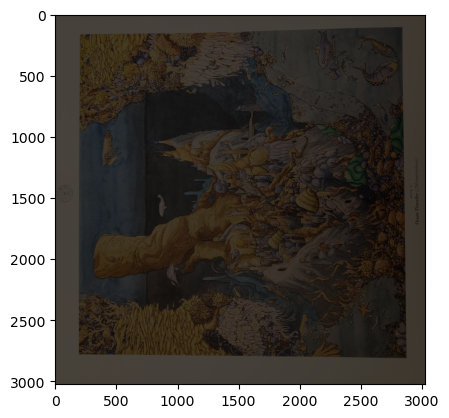

In [9]:
# Make a copy of the image to modify
otrav_color_scale = otrav.copy()

# This way is slopy and lazy due to not being vectorized
for r in range(row):
    for c in range(col):
        for ch in range(channel):
            otrav_color_scale[r,c,ch] = otrav_color_scale[r,c,ch] * mult_value

plt.imshow(otrav_color_scale)


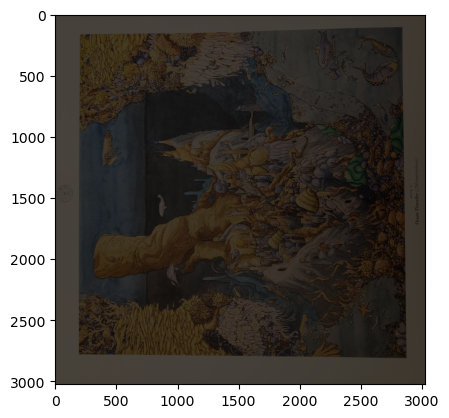

In [20]:
# A faster way to implement the above cell using vectorization

otrav_color_scale_fast = otrav.copy()
# This way is sleek and fast due to vectorization
otrav_color_scale_fast[:,:,:] = otrav_color_scale_fast[:,:,:] * mult_value

plt.imshow(otrav_color_scale_fast)

In [ ]:
# I've never used matplot lib sliders before so here it goes...

'''
# Create a subplot
fig, ax = plt.subplots() # Side by side plots of the old and new



# Create an axis for the slider
rect = (0.25, 0.1, 0.65, 0.03) #left, bottom, width, height
color_axs = plt.axes([rect])

# Make a slider
mult_slider = Slider(color_axs, 'Color Multiplier', 0.0, 2.0, 1.0)

# Update function to call when the slider moves
def update(val):
    m_val = mult_slider.val

    mult_otrav = otrav * m_val

mult_slider.on_changed(update)


'''


1. Do you get different results if you take out the gamma transformation before or after
  doing the multiplication? Why or why not?

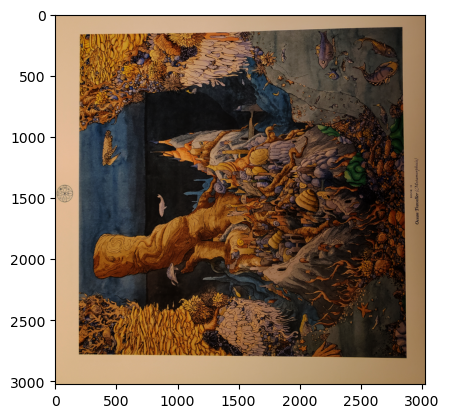

In [17]:
# Changing gamma

otrav_gamma = ski.exposure.adjust_gamma(otrav, gamma=2.22) # gamma > 1 shifts left to darker image
plt.imshow(otrav_gamma)


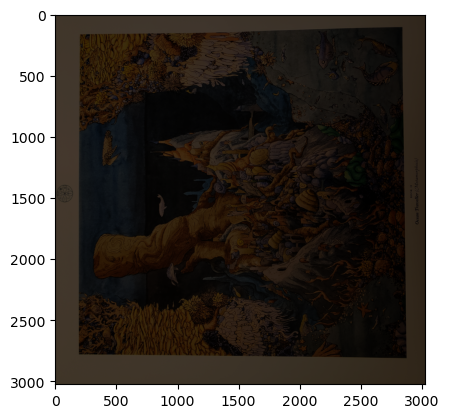

In [18]:
# Multiplying after the gamma correction
otrav_color_scale_fast_gammafirst = otrav_gamma.copy()
# This way is sleek and fast due to vectorization
otrav_color_scale_fast_gammafirst[:,:,:] = otrav_color_scale_fast_gammafirst[:,:,:] * mult_value

plt.imshow(otrav_color_scale_fast_gammafirst)

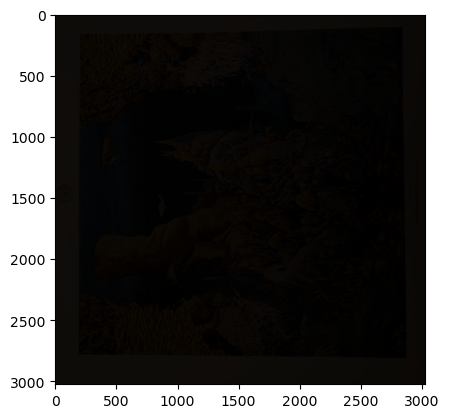

In [23]:
# Running the multiplication first and then the gamma correction

# Multiplying after the gamma correction
otrav_color_scale_fast_multfirst = otrav_color_scale_fast.copy()

otrav_color_scale_fast_multfirst = ski.exposure.adjust_gamma(otrav_color_scale_fast_multfirst, gamma=2.22) # gamma > 1 shifts left to darker image
plt.imshow(otrav_color_scale_fast_multfirst)

It does appear that the order in which the multiplication and gamma are performed matters.  

2. Take the same picture with your digital camera using different color balance settings
  (most cameras control the color balance from one of the menus). Can you recover what
  the color balance ratios are between the different settings? You may need to put your
  camera on a tripod and align the images manually or automatically to make this work.
  Alternatively, use a color checker chart (Figure 10.3b), as discussed in Sections 2.3 and
  10.1.1.

How do smartphones do this? Is this just a filter that is applied (Western, Sepia, etc)?


In [53]:
# I can at least recover the info by moving the RGB to greyscale and looking at the luminace at each channel
#  I'm not 100% certain this is correct...


# Convert to grayscale for total luminance
otrav_gray = ski.color.rgb2gray(otrav)

# take the gray image and divide by the rgb image at specific channels (R G B)
#  NOTE: Some of the pixel values may be zero in the origional image.  Adding by epsilon to remove divide by zero error

eps = 1E-10

red_lumance = otrav_gray / (otrav[:,:,0] + eps)
green_lumance = otrav_gray / (otrav[:,:,1] + eps)
blue_lumance = otrav_gray / (otrav[:,:,2] + eps)



In [54]:
# Calculate the RGB balances by taking the means of the lumances
red_balance = np.mean(red_lumance)
green_balance = np.mean(green_lumance)
blue_balance = np.mean(blue_lumance)
print(f'Red: {red_balance} Green: {green_balance} Blue: {blue_balance}')

Red: 3887.926956085311 Green: 324938.60517352435 Blue: 8624939.865612589


In [55]:
# Calculating the color ratios by Szeliski [2022], eq: 2.117, pg. 77
#  EQ 2.117: r = R / (R+G+B)
red_ratio = red_balance / (red_balance + green_balance + blue_balance)
green_ratio = green_balance / (red_balance + green_balance + blue_balance)
blue_ratio = blue_balance / (red_balance + green_balance + blue_balance)
print(f'Red Ratio: {red_ratio} Green Ratio: {green_ratio} Blue Ratio: {blue_ratio}')


Red Ratio: 0.00043422251412162136 Green Ratio: 0.036290717307016364 Blue Ratio: 0.963275060178862


In [77]:
# Can this get me back the gamma values given that skimage is using the HDTV in BT.709 values for phosphorus
y = (.2125*red_ratio) + (.7145*green_ratio) + (.0721*blue_ratio)

gamma = 1 / np.log(y)
print(f"Y': {y} gamma: {gamma}")

Y': 854852.982185319 gamma: 0.07321349133726221


Getting histograms of each of the color channels

In [75]:
# Get the red, green, and blue channels of the image
red = otrav[:,:,0]
green = otrav[:,:,1]
blue = otrav[:,:,2]

(array([9.16130e+04, 8.47900e+03, 8.76700e+03, 9.37500e+03, 9.66200e+03,
        1.04290e+04, 1.08500e+04, 1.15040e+04, 1.19770e+04, 1.24640e+04,
        1.31280e+04, 1.34010e+04, 1.37400e+04, 1.46050e+04, 1.50740e+04,
        1.53240e+04, 1.61950e+04, 1.63330e+04, 1.69710e+04, 1.75180e+04,
        1.78760e+04, 1.85500e+04, 1.87560e+04, 1.93410e+04, 1.93160e+04,
        1.99390e+04, 2.04260e+04, 2.04430e+04, 2.09940e+04, 2.14030e+04,
        2.20370e+04, 2.23630e+04, 2.24210e+04, 2.27900e+04, 2.32070e+04,
        2.38370e+04, 2.42040e+04, 2.46060e+04, 2.52160e+04, 2.55510e+04,
        2.61320e+04, 2.69230e+04, 2.77900e+04, 2.81810e+04, 2.92530e+04,
        3.01100e+04, 3.11230e+04, 3.22420e+04, 3.33050e+04, 3.38330e+04,
        3.45760e+04, 3.58610e+04, 3.69610e+04, 3.82340e+04, 3.92590e+04,
        4.06520e+04, 4.15240e+04, 4.28440e+04, 4.37720e+04, 4.55780e+04,
        4.69170e+04, 4.78260e+04, 4.92420e+04, 5.00910e+04, 5.17940e+04,
        5.35290e+04, 5.52630e+04, 5.72850e+04, 5.92

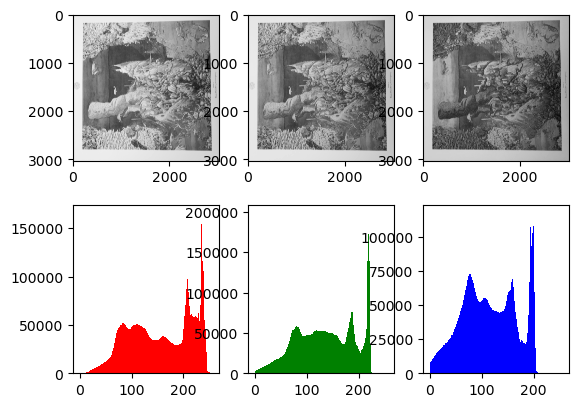

In [76]:
# Create a figure with 2 x 3 plots
fig, ax = plt.subplots(2,3)

# Show the R G B image lumances making sure to use the gray cmap
ax[0,0].imshow(red, cmap='gray')
ax[0,1].imshow(green, cmap='gray')
ax[0,2].imshow(blue, cmap='gray')

# Show the histograms after flattening the 2D image into 1D space for the values
bins = np.arange(-0.5, 255+1,1) # space the bins using numpy for the axis
ax[1,0].hist(red.flatten(), bins = bins, color='r')
ax[1,1].hist(green.flatten(), bins=bins, color='g')
ax[1,2].hist(blue.flatten(), bins=bins, color='b')


# Another way to do this is with skimage.exposure.histogram()
'''
If channel_axis is not set, the histogram is computed on the flattened image.
For color or multichannel images, set channel_axis to use a common binning for all channels.
Alternatively, one may apply the function separately on each channel to obtain a histogram
for each color channel with separate binning.
'''

3. Can you think of any reason why you might want to perform a color twist (Section 3.1.2) on the images? See also Exercise 2.8 for some related ideas

A color twist would allow for a 3x3 matrix to be used rather than a single value for multiplying the image.  This would allow for each color channel (RGB) to be scaled by a different value which could bring some colors forward more than others.  This could be useful if a blues needed to be darkened without much modifying reds.  A color twist is also often done to rebalance an image's color which can create a form of a digital filter (ie. sepia tones).